In [2]:
%pylab inline
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
file_dir = "/l1/data/FBDQA2021A_MMP_Challenge_ver0.2/data"

## 读入单个文件并观察

In [4]:
sym = 5
date = 10

file_name = f"snapshot_sym{sym}_date{date}_am.csv"

In [5]:
df = pd.read_csv(os.path.join(file_dir,file_name))
df

,date,time,sym,n_close,amount_delta,n_midprice,n_bid1,n_bsize1,n_bid2,n_bsize2,...,n_asize3,n_ask4,n_asize4,n_ask5,n_asize5,label_5,label_10,label_20,label_40,label_60
0,10,09:40:03,5,0.007455,25519.0,0.007987,0.007455,0.000002,0.006390,0.000022,...,0.000067,0.011715,0.000092,0.012780,0.000072,1.0,1.0,0.0,1.0,0.0
1,10,09:40:06,5,0.007455,1892.0,0.007987,0.007455,0.000001,0.006390,0.000022,...,0.000067,0.011715,0.000092,0.012780,0.000072,1.0,1.0,0.0,1.0,0.0
2,10,09:40:09,5,0.008520,5682.0,0.007987,0.007455,0.000001,0.006390,0.000022,...,0.000067,0.011715,0.000092,0.012780,0.000072,0.0,1.0,0.0,0.0,0.0
3,10,09:40:12,5,0.008520,0.0,0.007987,0.007455,0.000001,0.006390,0.000022,...,0.000067,0.011715,0.000092,0.012780,0.000072,0.0,0.0,0.0,0.0,0.0
4,10,09:40:15,5,0.006390,31189.0,0.007455,0.006390,0.000011,0.005325,0.000152,...,0.000067,0.011715,0.000092,0.012780,0.000072,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,10,11:19:45,5,0.010650,0.0,0.012247,0.010650,0.000011,0.009585,0.000011,...,0.000025,0.018104,0.000020,0.019169,0.000029,1.0,2.0,2.0,1.0,0.0
1995,10,11:19:48,5,0.010650,0.0,0.012247,0.010650,0.000011,0.009585,0.000011,...,0.000025,0.018104,0.000020,0.019169,0.000029,1.0,2.0,1.0,1.0,0.0
1996,10,11:19:51,5,0.010650,0.0,0.012247,0.010650,0.000011,0.009585,0.000011,...,0.000025,0.018104,0.000020,0.019169,0.000029,1.0,2.0,1.0,0.0,0.0
1997,10,11:19:54,5,0.013845,23800.0,0.012247,0.010650,0.000016,0.009585,0.000011,...,0.000025,0.018104,0.000020,0.019169,0.000029,1.0,2.0,0.0,0.0,0.0


# 检查异常值/缺失值

In [6]:
# 确定有无na值，若有要进行处理（是否一定能用0填充）
df.isnull().values.any()

False

In [7]:
# 确定有无inf值
cols = df.columns
for col in cols:
    # 如果不是object
    if not(df[col].dtypes == 'object'):
        # 判断是否有inf值，有则打印列名
        if not (np.all(np.isfinite(df[col].values))):
            print(col)

In [8]:
df.describe()

,date,sym,n_close,amount_delta,n_midprice,n_bid1,n_bsize1,n_bid2,n_bsize2,n_bid3,...,n_asize3,n_ask4,n_asize4,n_ask5,n_asize5,label_5,label_10,label_20,label_40,label_60
count,1999.0,1999.0,1999.000000,1.999000e+03,1999.000000,1999.000000,1.999000e+03,1999.000000,1.999000e+03,1999.000000,...,1.999000e+03,1999.000000,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,10.0,5.0,0.013500,9.653058e+03,0.013592,0.012813,1.757113e-05,0.011550,2.699941e-05,0.010277,...,2.453142e-05,0.017899,2.613767e-05,0.019049,0.000032,0.982991,0.965983,0.974987,0.997499,0.991496
std,0.0,0.0,0.004833,3.894842e+04,0.004683,0.004743,1.861962e-05,0.004720,2.183891e-05,0.004602,...,2.913714e-05,0.004558,2.491074e-05,0.004536,0.000027,0.678359,0.796541,0.762204,0.837374,0.884426
min,10.0,5.0,0.004260,0.000000e+00,0.004792,0.004260,2.047766e-07,0.003195,3.656724e-07,0.002130,...,3.656724e-07,0.008520,3.656724e-07,0.009585,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.0,5.0,0.009585,0.000000e+00,0.010117,0.009585,4.022397e-06,0.008520,9.873156e-06,0.006390,...,7.313449e-06,0.014909,9.507483e-06,0.015974,0.000014,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.0,5.0,0.012780,0.000000e+00,0.013845,0.012780,1.097017e-05,0.011715,2.230602e-05,0.009585,...,1.389555e-05,0.018104,1.682093e-05,0.019169,0.000026,1.000000,1.000000,1.000000,1.000000,1.000000
75%,10.0,5.0,0.015974,3.800000e+03,0.015442,0.014909,2.493886e-05,0.013845,3.656724e-05,0.011715,...,3.510455e-05,0.019169,3.656724e-05,0.020234,0.000044,1.000000,2.000000,2.000000,2.000000,2.000000
max,10.0,5.0,0.028754,1.007574e+06,0.029819,0.028754,1.568735e-04,0.027689,1.518638e-04,0.026624,...,1.930750e-04,0.034079,1.930750e-04,0.037274,0.000117,2.000000,2.000000,2.000000,2.000000,2.000000


In [20]:
## 当数量级不一致时，很有可能影响后续计算结果
print(1e-10 + 1.0 == 1.0)
print(1e-20 + 1.0 == 1.0)
## 譬如上图的amount_delta

False
True


## 画图观察

<AxesSubplot:>

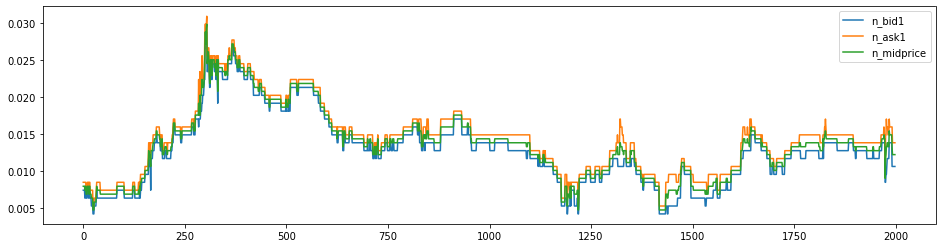

In [10]:
df[['n_bid1','n_ask1','n_midprice']].plot(figsize = (16,4))


<AxesSubplot:>

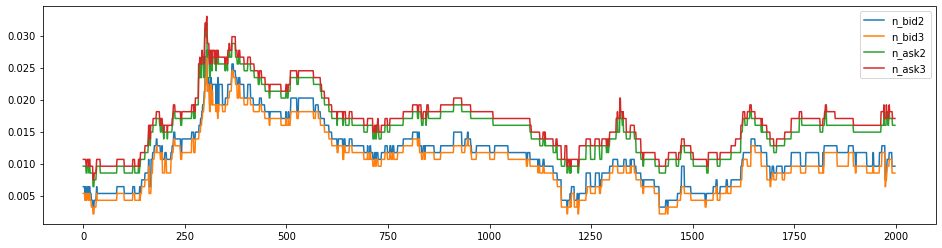

In [11]:
df[['n_bid2','n_bid3','n_ask2','n_ask3']].plot(figsize = (16,4))

Text(0.5, 1.0, 'price_label')

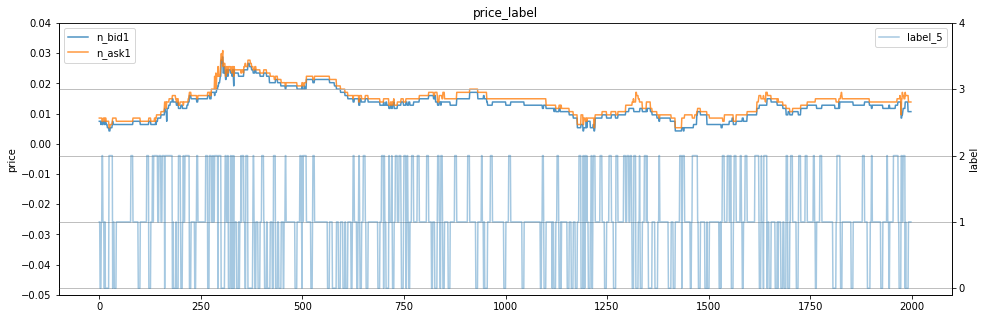

In [12]:
_, ax1=plt.subplots(1,1,figsize=(16,5))
df[['n_bid1','n_ask1']].plot(ax=ax1,alpha=0.8)
ax1.set_yticks(np.arange(-0.05,0.05,0.01))       
ax1.set_ylabel('price') 
plt.legend(loc=2)

ax2 = ax1.twinx()
df[['label_5']].plot(ax=ax2,grid=True,alpha=0.4)
ax2.set_yticks(np.arange(0,5,1))
ax2.set_ylabel('label')    
plt.legend(loc=1)   

plt.title('price_label')

<AxesSubplot:>

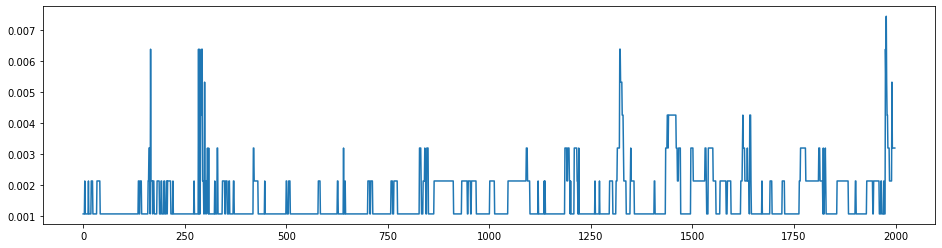

In [13]:
df['spread'] = df['n_ask1'] - df['n_bid1']
df['spread'].plot(figsize = (16,4))

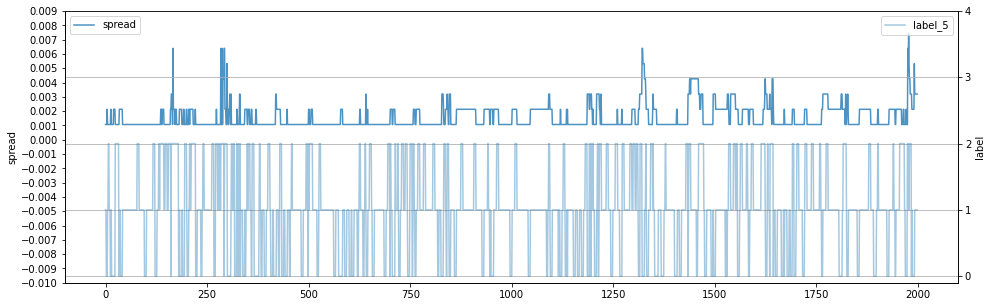

In [14]:
_, ax1=plt.subplots(1,1,figsize=(16,5))
df[['spread']].plot(ax=ax1,alpha=0.8)
ax1.set_yticks(np.arange(-0.01,0.01,0.001))       
ax1.set_ylabel('spread') 
plt.legend(loc=2)

ax2 = ax1.twinx()
df[['label_5']].plot(ax=ax2,grid=True,alpha=0.4)
ax2.set_yticks(np.arange(0,5,1))
ax2.set_ylabel('label')    
plt.legend(loc=1)   

In [15]:
df['adj_label_5'] = df['label_5'].copy()
df.loc[df['label_5']==2,'adj_label_5'] = 0

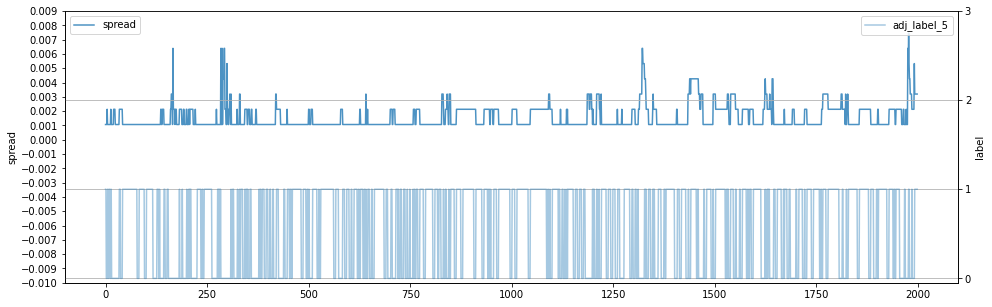

In [16]:
_, ax1=plt.subplots(1,1,figsize=(16,5))
df[['spread']].plot(ax=ax1,alpha=0.8)
ax1.set_yticks(np.arange(-0.01,0.01,0.001))       
ax1.set_ylabel('spread') 
plt.legend(loc=2)

ax2 = ax1.twinx()
df[['adj_label_5']].plot(ax=ax2,grid=True,alpha=0.4)
ax2.set_yticks(np.arange(0,4,1))
ax2.set_ylabel('label')    
plt.legend(loc=1)   

## size变化过大不好处理：log

In [36]:
df[['n_bsize1','n_asize1', 'n_bid1', 'n_ask1']].describe()

,n_bsize1,n_asize1,n_bid1,n_ask1
count,1.999000e+03,1.999000e+03,1999.000000,1999.000000
mean,1.757113e-05,2.039675e-05,0.012813,0.014371
std,1.861962e-05,2.999861e-05,0.004743,0.004659
min,2.047766e-07,3.656724e-07,0.004260,0.005325
25%,4.022397e-06,5.119414e-06,0.009585,0.010650
50%,1.097017e-05,1.133585e-05,0.012780,0.014909
75%,2.493886e-05,2.523140e-05,0.014909,0.015974
max,1.568735e-04,2.077019e-04,0.028754,0.030884


In [26]:
# 写个for循环更好，这里只是为了表达清晰
df['bsize1'] = df['n_bsize1'].map(np.log1p)    # 为什么要用log1p？
df['bsize2'] = df['n_bsize2'].map(np.log1p)
df['bsize3'] = df['n_bsize3'].map(np.log1p)
df['bsize4'] = df['n_bsize4'].map(np.log1p)
df['bsize5'] = df['n_bsize5'].map(np.log1p)
df['asize1'] = df['n_asize1'].map(np.log1p)
df['asize2'] = df['n_asize2'].map(np.log1p)
df['asize3'] = df['n_asize3'].map(np.log1p)
df['asize4'] = df['n_asize4'].map(np.log1p)
df['asize5'] = df['n_asize5'].map(np.log1p)
df['amount'] = df['amount_delta'].map(np.log1p)

df[['bsize1','n_bsize1','bsize2','n_bsize1','asize1','n_asize1','asize2','n_asize2','amount','amount_delta']].describe()


,bsize1,n_bsize1,bsize2,n_bsize1,asize1,n_asize1,asize2,n_asize2,amount,amount_delta
count,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1999.000000,1.999000e+03
mean,1.757080e-05,1.757113e-05,2.699881e-05,1.757113e-05,2.039609e-05,2.039675e-05,2.541365e-05,2.541452e-05,3.148531,9.653058e+03
std,1.861893e-05,1.861962e-05,2.183795e-05,1.861962e-05,2.999626e-05,2.999861e-05,3.299696e-05,3.299951e-05,4.439973,3.894842e+04
min,2.047765e-07,2.047766e-07,3.656724e-07,2.047766e-07,3.656724e-07,3.656724e-07,3.656724e-07,3.656724e-07,0.000000,0.000000e+00
25%,4.022389e-06,4.022397e-06,9.873107e-06,4.022397e-06,5.119401e-06,5.119414e-06,7.313422e-06,7.313449e-06,0.000000,0.000000e+00
50%,1.097011e-05,1.097017e-05,2.230577e-05,1.097017e-05,1.133578e-05,1.133585e-05,1.389546e-05,1.389555e-05,0.000000,0.000000e+00
75%,2.493855e-05,2.493886e-05,3.656657e-05,2.493886e-05,2.523108e-05,2.523140e-05,3.071601e-05,3.071648e-05,8.243019,3.800000e+03
max,1.568612e-04,1.568735e-04,1.518522e-04,1.568735e-04,2.076804e-04,2.077019e-04,2.098739e-04,2.098960e-04,13.823057,1.007574e+06


# 查看取对数后的数据分布

Text(0.5, 1.0, 'price_vol')

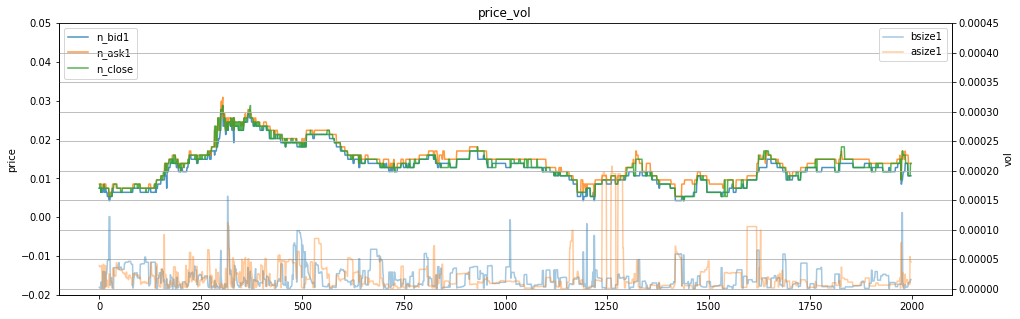

In [35]:
_, ax1=plt.subplots(1,1,figsize=(16,5))
df[['n_bid1','n_ask1','n_close']].plot(ax=ax1,alpha=0.8)
ax1.set_yticks(np.arange(-0.02,0.05,0.01))       
ax1.set_ylabel('price') 
plt.legend(loc=2)

ax2 = ax1.twinx()
df[['bsize1','asize1']].plot(ax=ax2,grid=True,alpha=0.4)
ax2.set_yticks(np.arange(0,0.0005,0.00005))
ax2.set_ylabel('vol')    
plt.legend(loc=1)   

plt.title('price_vol')
# plt.savefig('price_vol.png', dpi=400, bbox_inches='tight')     